In [1]:
import os
import numpy as np
#import statistics as stats
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import feature_selection, linear_model , metrics,discriminant_analysis , preprocessing , neighbors , cross_validation
from sklearn import utils
pd.set_option('display.max_rows', 15)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 15)

%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("coders.csv")

/Users/dkhandelwal/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (21,57) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15620 entries, 0 to 15619
Columns: 113 entries, Age to StudentDebtOwe
dtypes: float64(85), object(28)
memory usage: 13.5+ MB


In [4]:
df.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampName,...,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,SchoolDegree,SchoolMajor,StudentDebtOwe
0,28.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,20000.0
1,22.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,"some college credit, no degree",NaN,NaN
2,19.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,high school diploma or equivalent (GED),NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,bachelor's degree,Cinematography And Film,7000.0
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,NaN


# Problem- Lets try to predict who will get a job after a Boot camp

In [5]:
y = df.BootcampFullJobAfter

In [6]:
df.BootcampFullJobAfter.isnull().sum()

14985

In [7]:
len (df)

15620

In [9]:
df = df[(df.BootcampFullJobAfter.notnull())]

In [10]:
len(df)

635

In [13]:
df.columns

Index([u'Age', u'AttendedBootcamp', u'BootcampFinish', u'BootcampFullJobAfter',
       u'BootcampLoanYesNo', u'BootcampMonthsAgo', u'BootcampName',
       u'BootcampPostSalary', u'BootcampRecommend', u'ChildrenNumber',
       ...
       u'ResourceSoloLearn', u'ResourceStackOverflow', u'ResourceTreehouse',
       u'ResourceUdacity', u'ResourceUdemy', u'ResourceW3Schools',
       u'ResourceYouTube', u'SchoolDegree', u'SchoolMajor', u'StudentDebtOwe'],
      dtype='object', length=113)

In [19]:
df[[3]].isnull().sum()

BootcampFullJobAfter    0
dtype: int64

In [32]:
for i in range(0 , len(df.columns)):
    # counting the NUll values
    count_null = df[[i]].isnull().sum()
    if (count_null.all() > 400):
        print i
        print count_null
        #Dropping Null columns from the axis 
        df.drop(df.columns[i] , axis = 1 ,inplace = True )
    else:
        continue
    
    

In [38]:
# From 113 columns we are doiwn to 28 columns
len(df.columns)

28

In [39]:
df.columns

Index([u'BootcampFullJobAfter', u'BootcampPostSalary', u'CodeEventBootcamp',
       u'CodeEventGameJam', u'CodeEventNodeSchool', u'CodeEventRailsGirls',
       u'CommuteTime', u'EmploymentFieldOther', u'FinanciallySupporting',
       u'HasFinancialDependents', u'HasStudentDebt', u'ID.y', u'IsSoftwareDev',
       u'JobRelocateYesNo', u'LanguageAtHome', u'NetworkID', u'Part2StartTime',
       u'PodcastDeveloperTea', u'PodcastJsAir', u'PodcastRubyRogues',
       u'PodcastWebAhead', u'ResourceCodecademy', u'ResourceEggHead',
       u'ResourceKhanAcademy', u'ResourceOther', u'ResourceSoloLearn',
       u'ResourceUdemy', u'SchoolMajor'],
      dtype='object')

In [41]:
df.BootcampFullJobAfter.value_counts()

1.0    371
0.0    264
Name: BootcampFullJobAfter, dtype: int64

Note that the classes are equally represented and hence there is no need for a stratified sampling

In [42]:
df.columns

Index([u'BootcampFullJobAfter', u'BootcampPostSalary', u'CodeEventBootcamp',
       u'CodeEventGameJam', u'CodeEventNodeSchool', u'CodeEventRailsGirls',
       u'CommuteTime', u'EmploymentFieldOther', u'FinanciallySupporting',
       u'HasFinancialDependents', u'HasStudentDebt', u'ID.y', u'IsSoftwareDev',
       u'JobRelocateYesNo', u'LanguageAtHome', u'NetworkID', u'Part2StartTime',
       u'PodcastDeveloperTea', u'PodcastJsAir', u'PodcastRubyRogues',
       u'PodcastWebAhead', u'ResourceCodecademy', u'ResourceEggHead',
       u'ResourceKhanAcademy', u'ResourceOther', u'ResourceSoloLearn',
       u'ResourceUdemy', u'SchoolMajor'],
      dtype='object')

# Analyzing Each feature one at a time

In [45]:
df.BootcampPostSalary.isnull().sum()

305

In [52]:
len(df.BootcampPostSalary.value_counts().index)

85

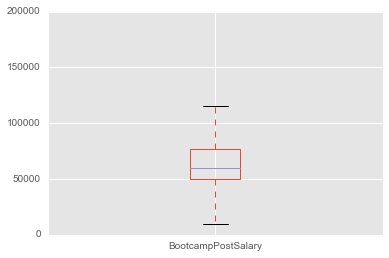

In [46]:
# plotting a box plot to chck the outliers and central tendencies
df['BootcampPostSalary'].plot(kind = 'box')

In [53]:
df.BootcampPostSalary.value_counts()

60000.0     33
50000.0     21
65000.0     17
70000.0     16
75000.0     15
55000.0     14
40000.0     12
            ..
37500.0      1
28000.0      1
7992.0       1
41600.0      1
92500.0      1
114000.0     1
86000.0      1
Name: BootcampPostSalary, dtype: int64

- 85 unique values
- 305 Null 
- No outliers

In [69]:
df.BootcampPostSalary.mean()

33124.98740157481

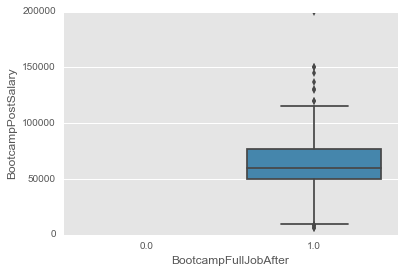

In [58]:
sns.boxplot(x = 'BootcampFullJobAfter' , y = 'BootcampPostSalary' , data = df) 

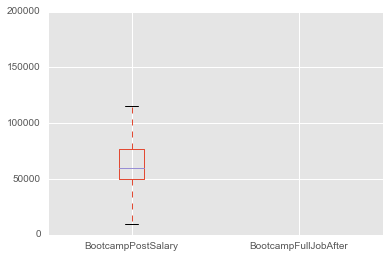

In [56]:
df[['BootcampPostSalary' , 'BootcampFullJobAfter']].plot(kind = 'box')

In [66]:
df.loc[df.BootcampPostSalary.isnull() , 'BootcampPostSalary'] = 0

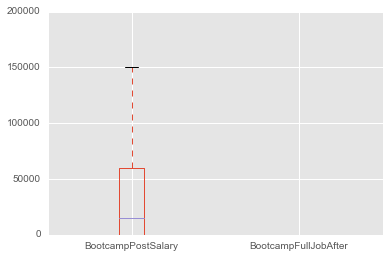

In [67]:
df[['BootcampPostSalary' , 'BootcampFullJobAfter']].plot(kind = 'box')

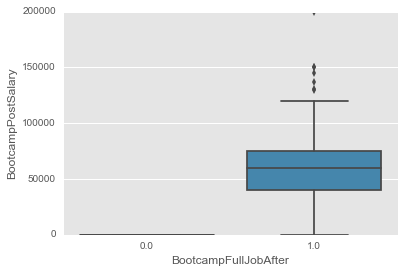

In [68]:
sns.boxplot(x = 'BootcampFullJobAfter' , y = 'BootcampPostSalary' , data = df) 


- As expected , mean goes down by adding zeros.